In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
csv_test = pd.read_csv('answer.csv')

In [64]:
csv_test.shape

(3883, 19)

In [65]:
csv_test.head(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Toy Story (1995)
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Jumanji (1995)
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,Grumpier Old Men (1995)


In [66]:
# x와 y컬럼을 지정
x_columns = ["Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
y_column = 'title'

In [67]:
#y컬럼의 문자열값을 labelEncoder를 통해 숫자로 바꾼다
y_true_label_encoder = preprocessing.LabelEncoder()
y_true_encoded       = y_true_label_encoder.fit_transform(csv_test[y_column])
print(list(csv_test[y_column][:5]),'->',list(y_true_encoded[:5])) #샘플출력

['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)'] -> [3574, 1858, 1483, 3716, 1177]


In [152]:
kMeansModels              = dict() # k값별 모델 저장할 딕셔너리
kMeansModelPreds          = dict() # k값별 모델 예측 결과 저장할 딕셔너리
kMeansModelLabelEncoder   = dict() # k값별 라벨인코더 저장할 딕셔너리

sumSquaredDistancesList   = list() # 샘플과 클러스터 센터간 거리 제곱의 합 리스트
silhouetteScoreList       = list() # Silhouette Coefficient 평균 리스트

ks = [3] # k값으로 2부터 9까지 테스트한다
for k in ks: # k값 순회
    model = KMeans(n_clusters=k, random_state=0, n_init=100).fit(csv_test[x_columns]) # k개 클러스터로 모델 생성
    model.cluster_centers_
    model.labels_
#     print(model.labels_[0:100])
#     print(csv_test[y_column][0:100])
result={}
for (idx,title) in enumerate(csv_test[y_column][0:100]):
    if result.get(model.labels_[idx]) :
        result[model.labels_[idx]].append(title)
    else:
        result[model.labels_[idx]]=[title]
print(result)
#     cluster_labels = model.fit_predict(csv_test[x_columns]) # X컬럼으로 지정된 필드값으로 피팅
    
#     y_pred_label_encoder = preprocessing.LabelEncoder() # 예측한 클러스터에서 사용할 라벨인코더
#     # 초기 임의 값 (unknown 1, unknown 2...) 으로 인코딩한다
#     y_pred_label_encoder.fit(np.array(['unknown ' + str(i+1) for i in range(0, k, 1)], dtype=object))
#     for pred_label_num in range(0,k,1): # 각 클러스터 순회   
#         # 해당 클러스터에서 가장 많이 출력한 실제 값의 인덱스를 구한다
#         most_frequent_index = np.argmax(np.bincount(y_true_encoded[cluster_labels==pred_label_num]))
#         # 구한 인덱스의 라벨을 구해서 해당클러스터 라벨로 업데이트한다
#         y_pred_label_encoder.classes_[pred_label_num] = y_true_label_encoder.classes_[most_frequent_index]
    
#     kMeansModels[k]     = model                       # 모델 저장
#     kMeansModelPreds[k] = cluster_labels              # 모델 예측결과 저장     
#     kMeansModelLabelEncoder[k] = y_pred_label_encoder # 라벨인코더 저장
#     sumSquaredDistancesList.append(model.inertia_)    # 샘플과 클러스터 센터간 거리 제곱의 합 저장
#     silhouetteScoreList.append(silhouette_score(csv_test[x_columns].values, cluster_labels)) # Silhouette Score저장
#     print(sumSquaredDistancesList)

{0: ['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Sabrina (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Ace Ventura: When Nature Calls (1995)', 'Get Shorty (1995)', 'Babe (1995)', 'It Takes Two (1995)', 'Clueless (1995)', 'To Die For (1995)', 'Mighty Aphrodite (1995)', 'Big Green, The (1995)', "Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)", 'Two if by Sea (1996)', 'Bio-Dome (1996)', 'French Twist (Gazon maudit) (1995)', 'Friday (1995)', 'Kicking and Screaming (1995)', 'Big Bully (1996)', 'Last Summer in the Hamptons (1995)', 'Dunston Checks In (1996)', 'Black Sheep (1996)', 'Vampire in Brooklyn (1995)', 'In the Bleak Midwinter (1995)', 'Bottle Rocket (1996)'], 1: ['Jumanji (1995)', 'Heat (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'Balto (1995)', 'Cutthroat Island (1995)', 'Four Rooms (1995)', 'Money Train (1995)', 'A

In [77]:
# print(kMeansModels)

LabelEncoder()


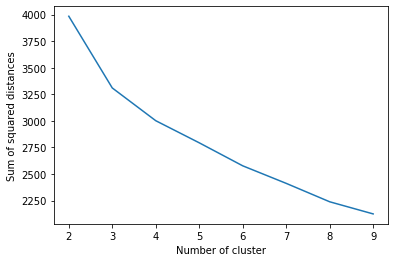

In [29]:
plt.plot(ks, sumSquaredDistancesList)
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distances")
plt.show()

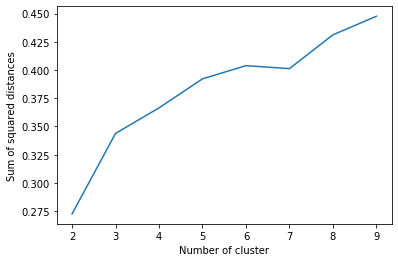

In [30]:
plt.plot(ks, silhouetteScoreList)
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distances")
plt.show()

In [119]:
def render_plot(x_col='Action', y_col='Adventure', k=3):
    y_pred        = kMeansModelPreds[k]        # 모델 예측값
    label_encoder = kMeansModelLabelEncoder[k] # 라벨인코더
    
    # 원본과 예측값을 합쳐 데이터셋을 준비
    mdf = pd.concat([csv_test, pd.DataFrame(label_encoder.inverse_transform(y_pred), columns=[y_column+'_pred'])], axis=1)
    
    plt.figure(figsize=(15,8)) # 출력 크기를 지정
    
    ddf = mdf[mdf[y_column] != mdf[y_column+'_pred']] # 실제라벨과 예측라벨이 틀린 경우 추출
    # X기호로 error임을 표시한다
    plt.scatter(x=ddf[x_col], y=ddf[y_col], c='black', marker='x', s=300, label='error') 
    print(plt.scatter)
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black'] # 컬러값 리스트
    for (idx,cls) in enumerate(list(y_true_label_encoder.classes_)):
        print(idx,cls)
        ddf = mdf[mdf[y_column] == cls] # 실제라벨 데이터는 작은 점으로 출력
#         print(ddf[x_col])
#         plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='.', linewidths=20, s=50, label=cls)
#         ddf = mdf[mdf[y_column+'_pred'] == cls] # 예측라벨 데이터는 큰 원으로 출력
#         print(mdf)
#         plt.scatter(x=ddf[x_col], y=ddf[y_col], c=colors[idx], marker='o', linewidths=20, s=2, label=cls+' pred')
    
#     plt.legend();plt.xlabel(x_col);plt.ylabel(y_col)
#     print('accuracy {:.2f}'.format(np.mean(mdf[y_column] == mdf[y_column+'_pred']))) # 정확도 출력
#     plt.show()

In [120]:
from ipywidgets import interact

In [121]:
interact(render_plot, x_col=x_columns, y_col=x_columns, k=ks)

interactive(children=(Dropdown(description='x_col', options=('Action', 'Adventure', 'Animation', "Children's",…

<function __main__.render_plot(x_col='Action', y_col='Adventure', k=3)>

In [ ]:
https://mubaris.com/posts/kmeans-clustering/